# <p style="text-align: center;"> Predicting Car Prices Using K-Nearest Neighbors </p>
# <center>Title</center>


## Introduction To The Data Set

In this project we will explore some of the fundamentals of Machine Learning using the K-Nearest Neighbors algorithm. We will use it help us predict a car's market price using its attributes. 

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 

### Source of the data
The dataset was obtained from the **UC Irvine Machine Learning Repository**
(Dua, D. and Graff, C. (2019). UCI Machine Learning Repository http://archive.ics.uci.edu/ml. Irvine, CA: University of California, School of Information and Computer Science.)

You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile).

### Initial Exploration of the Data
The dataset is lacking the columns names. We will proceed to add them manually based on the documentation.

In order to apply the K-Nearest Neighbors algorithm we need to get rid of any data not represented as continuous numerical values. The metric that we will compute is the Euclidean Distance, which is only valid using continuous values.

We will set the `price`column as our target column.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

sns.set_palette('Paired', 13)
pd.options.display.max_columns = 99

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
        'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# Select only the columns with continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                          'curb-weight', 'bore', 'stroke', 'compression-rate', 
                          'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [6]:
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning
As part of the cleaning process we will:
 - Handle missing values: first converting them into NaN values, and then deciding on how to replace them with useful data.
 - Rescale the data: after this normalization the values will range between 0 and 1, which is necessary for the Euclidean Distance to work properly.

In [7]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# Convert all columns to float
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [10]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [11]:
# Confirm that there's no more missing values!
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

## Univariate Model
We will start with some univariate K-Nearest Neighbors models. Starting with simple models before moving to more complex models helps us structure our code workflow and understand the features better.

In order to do this we create a function named `knn_train_test()` that encapsulates the training and simple validation process:
- This function should split the data set into a training and test set.
- Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
- Finally, it should calculate the RMSE and return that value.

### Error metric
The metric we will use for this project is the **Root Mean Squared Error (RMSE)**. 
Both, the MSE and RMSE are highly biased for higher values, but the RMSE is better in terms of reflecting performance when dealing with large error values.

In [13]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

- Now we apply the function and plot the results:

In [14]:
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results).sort_values(ascending=False)

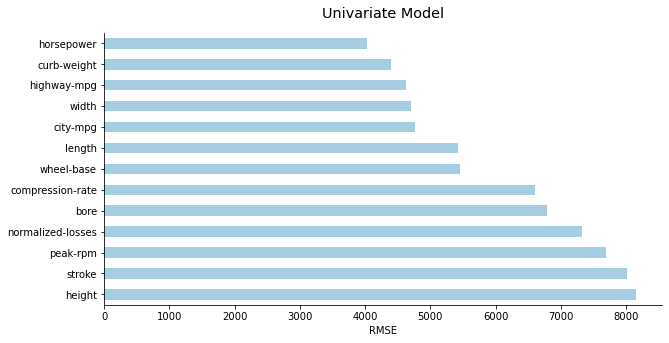

In [15]:
rmse_results_series.plot.barh(figsize=(10,5))
plt.title('Univariate Model', pad=15, fontsize='x-large')
plt.xlabel('RMSE')
sns.despine()

By this approach, the features that better reacted were `horsepower` and `curb-weight`.

### Various values for k

- Next, we will modify the `knn_train_test()` function to accept a parameter for the k value.

In [16]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Different k values to train the model
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

- In this case, the function will return five different results for each column, based on the different values of k.

In [17]:
k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

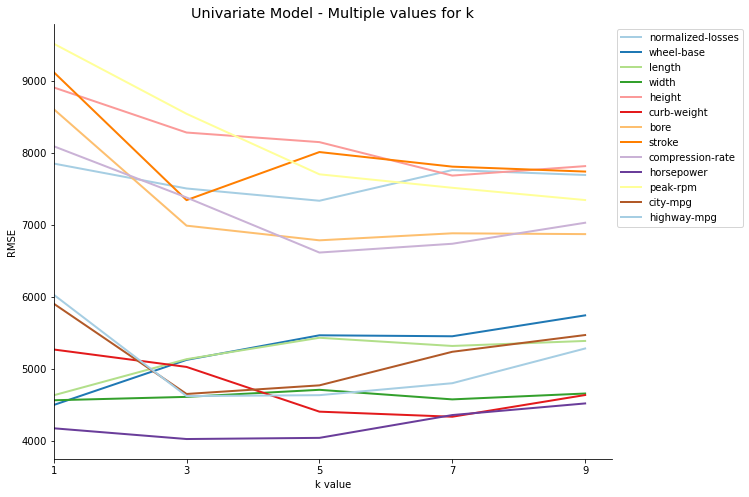

In [18]:
fig = plt.figure(figsize=(10,8))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, linewidth=2)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.xlim(1)
plt.xticks([1,3,5,7,9])
plt.title('Univariate Model - Multiple values for k', fontsize='x-large')
plt.legend([k for k in k_rmse_results.keys()], bbox_to_anchor=(1, 1))
sns.despine()

As we can see, all of the columns present variations when using different values for k, and most importantly, different k values allow different features to perform better.

For example, `curb-weight` performs best when `k=7`, but `compression-rate` does it when `k=5`.

## Multivariate Model
Probably using only one column won't be enough to make good predictions. 
We will give our function the ability to work with different columns. For now we will only use the default value for k.

In order to decide which columns to use as features, we perform the mean of our last results for each column and select the ones that had the best outcome:

In [19]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


For this step we will work with the best 6 features:
- `horsepower`
- `width`
- `curb-weight`
- `highway-mpg`
- `length`
- `city-mpg`

In [20]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [21]:
k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats], 'price', numeric_cars)
    
k_rmse_results

{'2 best features': {5: 3589.3132622073304},
 '3 best features': {5: 3305.9401397969677},
 '4 best features': {5: 3358.6915801682458},
 '5 best features': {5: 3665.546673045813},
 '6 best features': {5: 3628.261188214127}}

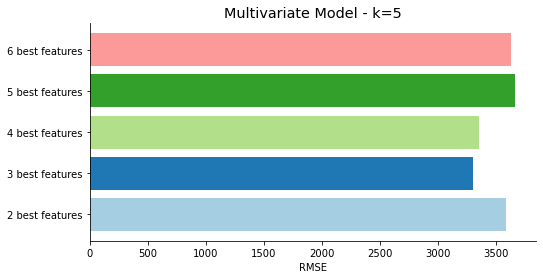

In [22]:
plt.figure(figsize=(8,4))
for k,v in k_rmse_results.items():
    plt.barh(k, v[5])
plt.title('Multivariate Model - k=5', fontsize='x-large')
plt.xlabel('RMSE')
sns.despine()

We can see how using different amounts of features also affects the performance of the model. The next step is combining the different tools we have developed in order to reach a lower RMSE.

## Hyperparameter Tuning
Here we optimize our function in order to allow different values for k and various features, at the same time.

- The k values will range from 1 to 25

In [23]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [24]:
k_rmse_results = {}

for nr_best_feats in range(2,5):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats], 'price', numeric_cars)

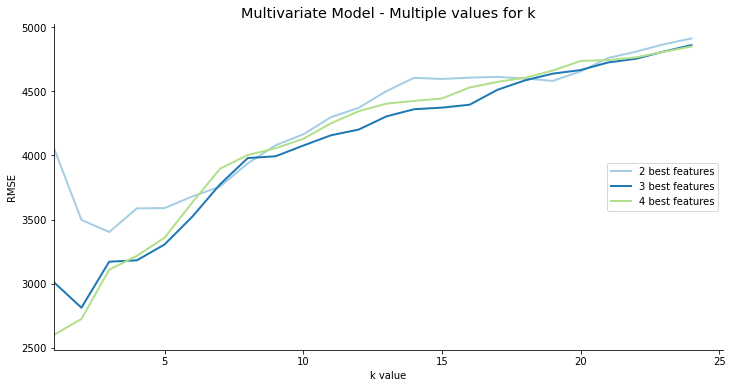

In [25]:
plt.figure(figsize=(12,6))
for_legend = []
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    for_legend.append(k)
    
    plt.plot(x,y,linewidth=2)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

labels = k_rmse_results.keys()
sns.despine()
plt.xlim(1)
plt.legend(for_legend, loc='center right')
plt.title('Multivariate Model - Multiple values for k', fontsize='x-large')
plt.show()

We can see in the plot that, as we increase the value for k, the error goes down only a little bit right before starting to grow very rapidly.

Since our dataset is pretty small (only 201 entries), bigger values for k make increase rapidly the variance of the model. Therefore, the model will not generalize well outside the training set.

One way to improve the model would be to increase the size of the dataset. Unfortunately, the dataset we are working with is limited.

Another way in which we can improve the performance without adding new data is to perform cross validation. This means dividing the data in a certain amount of folds, choosing one as the test set and the rest as the train sets. We then run several predictions, and for each prediction we switch the fold that acts as test set.

In this case we will divide the data in 10 folds. Also keeping the values of k ranging from 1 to 25.

In [26]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
        
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Instatiate model
        knn = KNeighborsRegressor(n_neighbors=k)
        # Using cross_val_score to fit and predict model
        # Output is root_mean_squared_error
        scores = cross_val_score(knn, 
                                 df[train_cols], 
                                 df[target_col], 
                                 cv=10,
                                 scoring='neg_root_mean_squared_error')
        # Take the mean of the results
        rmse = np.mean(np.abs(scores))
        
        k_rmses[k] = rmse
    return k_rmses

In [27]:
k_rmse_results = {}

for nr_best_feats in range(2,5):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats], 'price', numeric_cars)

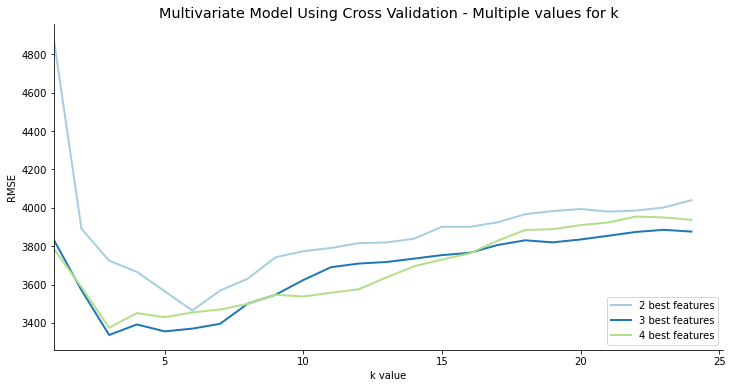

In [28]:
plt.figure(figsize=(12,6))
for_legend = []
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    for_legend.append(k)
    
    plt.plot(x,y,linewidth=2)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

labels = k_rmse_results.keys()
sns.despine()
plt.xlim(1)
plt.legend(for_legend, loc='lower right')
plt.title('Multivariate Model Using Cross Validation - Multiple values for k', 
          fontsize='x-large')
plt.show()

We can see that now the results of the predictions seem to be more stable and therefore more reliable.

## Final Thoughts 
During this project we explored some of the basics of the K-Nearest Neighbors algorithm:
- We started by reading in our data and performing some cleaning
- Then, as part of the machine learning section, we trained simple models and progressively added more complexity to them by:
    - Selecting more features
    - Increasing the number of neighbors (k values)
    - Performing cross validation
    
### Next Steps
Our job is far from over, though. There is a lot of room for improvement here. Some suggested next steps could be:
- Conducting some feature engineering
- Tweaking more the hyperparameteres of our model (i.e., leaf_size, p) 
- Training and testing different Machine Learning algorithms (i.e., Linear Regression, Decision Tree)

This options would allow us to lower the error obtained after running our model and help us arrive at the best possible predictions, which is a very exciting task but outside of the scope of this project.

## *Thank you for reading!*